# Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from statsmodels.tools.eval_measures import mse
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib

from matplotlib import cm
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes  
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)  

xscaler = MinMaxScaler()
yscaler = MinMaxScaler()
sns.set()

In [2]:
file_path = './classification_models/input_data/pspeo_master.xlsx'
output = 'figures/'
# import data frame for pre-processing
df = pd.read_excel(file_path)
df.head()

,sample,solv_ratio,add_type,swell_ratio,gisaxs_domain,gisaxs_fwhm,afm_domain,afm_grain,order_disorder
0,I_A_AC,80/20,Chloronaphthalene,1.00,31.302630,0.003697,33.737303,0.0048,0
1,I_A025,80/20,Chloronaphthalene,1.25,33.805848,0.003136,35.151690,0.0047,0
2,I_A050,80/20,Chloronaphthalene,1.50,34.176062,0.002970,35.397797,0.0534,0
3,I_A075,80/20,Chloronaphthalene,1.75,34.383751,0.003451,34.603726,0.0425,0
4,I_A_100,80/20,Chloronaphthalene,2.00,31.674148,0.005122,33.786210,0.0244,0


# Data pre-processing

In [3]:
# Assign input variables and target variable, eliminating static values
inputs = df.loc[:, ['solv_ratio', 'swell_ratio', 'add_type']]
targets = df.iloc[:, 4:8]
# Define mapping for solv_ratio
type_mapping = {100: 1, '90/10': 0.9, '80/20': 0.8, '70/30': 0.7, '60/40': 0.6, '50/50': 0.5}
inputs['solv_ratio'] = inputs['solv_ratio'].replace(type_mapping)

# Encode categorical input 'add_type'
le_addType = LabelEncoder()
inputs['add_type'] = le_addType.fit_transform(inputs['add_type'])

In [4]:
targets

,gisaxs_domain,gisaxs_fwhm,afm_domain,afm_grain
0,31.302630,0.003697,33.737303,0.0048
1,33.805848,0.003136,35.151690,0.0047
2,34.176062,0.002970,35.397797,0.0534
3,34.383751,0.003451,34.603726,0.0425
4,31.674148,0.005122,33.786210,0.0244
...,...,...,...,...
197,35.569033,0.003222,37.120415,0.1093
198,35.133195,0.002910,36.469102,0.0907
199,34.889468,0.002755,33.289887,0.1990
200,36.194647,0.002669,37.443701,0.0807


# Visualizations

In [5]:
# Custom color map
# Define the number of colors in the colormap
num_colors = 256

# Create the plasma colormap and its reverse
cmap_plasma = plt.cm.RdPu_r(np.linspace(0, 1, num_colors))
cmap_plasma_reverse = plt.cm.RdPu(np.linspace(0, 1, num_colors))

# Combine the colors to create the custom colormap
custom_cmap = np.vstack((cmap_plasma, cmap_plasma_reverse))

# Create the ListedColormap
custom_plasma = mcolors.ListedColormap(custom_cmap)

# Define colormap
cmap = plt.cm.RdPu
revmap = cmap.reversed()

In [10]:
print(inputs)

     solv_ratio  swell_ratio  add_type
0           0.8         1.00         0
1           0.8         1.25         0
2           0.8         1.50         0
3           0.8         1.75         0
4           0.8         2.00         0
..          ...          ...       ...
197         0.8         2.50         1
198         0.8         2.75         1
199         0.8         3.00         1
200         0.8         3.25         1
201         0.8         3.50         1

[202 rows x 3 columns]


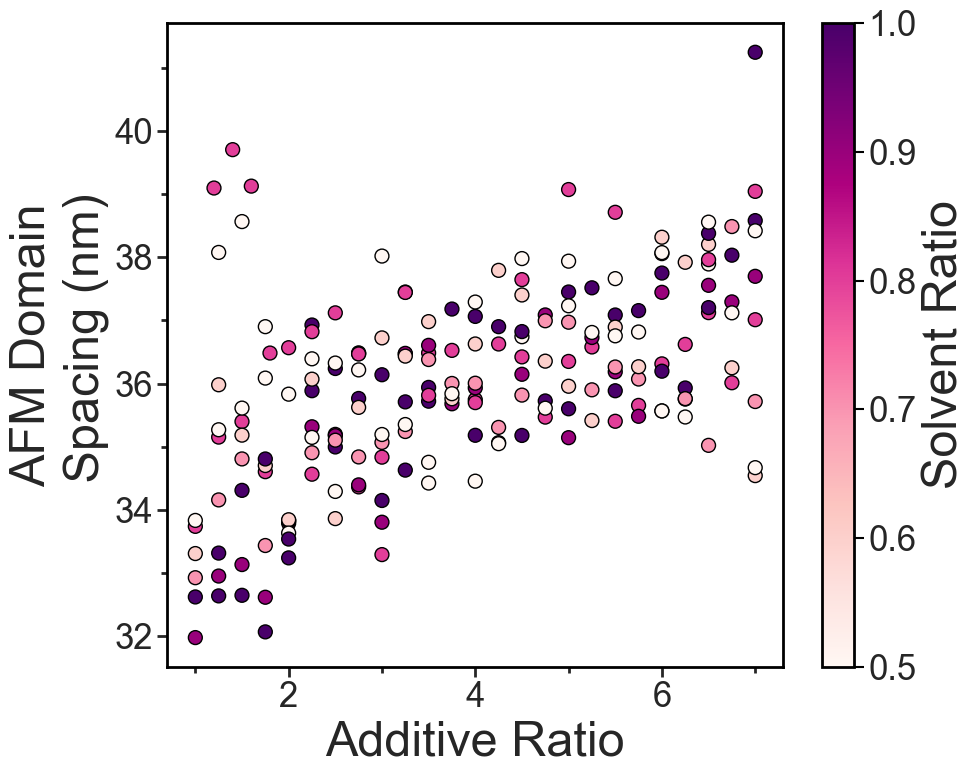

In [17]:
fig_title = 'afm_domain_scatter'

x1 = inputs['solv_ratio']
x2 = inputs['swell_ratio']
y = targets['afm_domain']

%matplotlib inline
rc('text', usetex=False)
rc('mathtext', fontset='cm')
rc('xtick', labelsize=25)   
rc('xtick.major', size=7)  
rc('xtick.minor', size=4)
rc('xtick.major', width=2)
rc('xtick.minor', width=2)
rc('ytick.major', width=2)
rc('ytick.minor', width=2)
rc('ytick', labelsize=25)
rc('ytick.major', size=7)
rc('ytick.minor', size=4)
rc('axes', labelsize=25) 
rc('axes', linewidth=2) 
rc('font',family='sans serif')
rc('font', style='normal')
rc('font', weight='500')
rc('font', size='15')
rc('axes', labelweight='500')
rc('axes.spines', **{'right':True, 'top':True}) 
plt.rcParams['font.family'] = 'Arial'


fig, ax = plt.subplots(figsize=(10,8))

sc = plt.scatter(x2, y, c=x1, s=100, cmap='RdPu', edgecolors='black')
colorbar = plt.colorbar(sc)
colorbar.ax.yaxis.set_tick_params(color='black', width=1.5)
colorbar.outline.set_edgecolor('black')
colorbar.set_label('Solvent Ratio', size=35)

plt.tick_params(axis='both', which='both', reset=True, top=False, right=False)

# ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Add black borders to the grid
for spine in ax.spines.values():
    spine.set_color('black')
ax.set_facecolor('white')

plt.xlabel("Additive Ratio", fontsize=35)
plt.ylabel("AFM Domain\n Spacing (nm)", fontsize = 35)

plt.grid(False)
plt.tight_layout()
plt.savefig(fig_title, format='pdf')
plt.show()

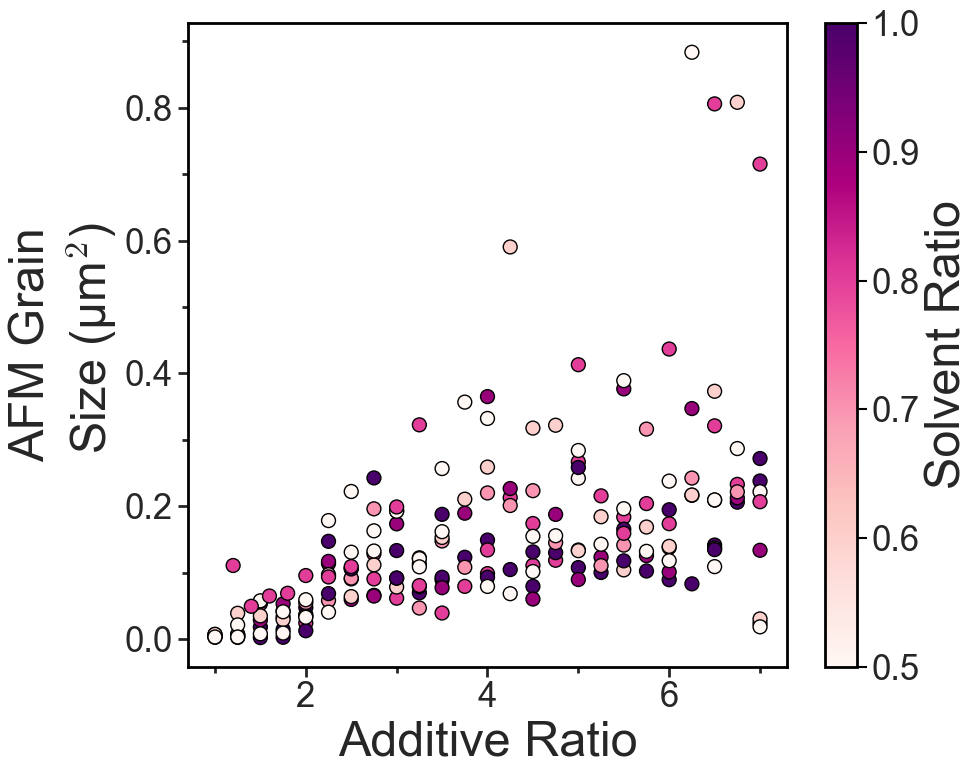

In [16]:
fig_title = 'afm_grain_scatter'

x1 = inputs['solv_ratio']
x2 = inputs['swell_ratio']
y = targets['afm_grain']

%matplotlib inline
rc('text', usetex=False)
rc('mathtext', fontset='cm')
rc('xtick', labelsize=25)   
rc('xtick.major', size=7)  
rc('xtick.minor', size=4)
rc('xtick.major', width=2)
rc('xtick.minor', width=2)
rc('ytick.major', width=2)
rc('ytick.minor', width=2)
rc('ytick', labelsize=25)
rc('ytick.major', size=7)
rc('ytick.minor', size=4)
rc('axes', labelsize=25) 
rc('axes', linewidth=2) 
rc('font',family='sans serif')
rc('font', style='normal')
rc('font', weight='500')
rc('font', size='15')
rc('axes', labelweight='500')
rc('axes.spines', **{'right':True, 'top':True}) 
plt.rcParams['font.family'] = 'Arial'


fig, ax = plt.subplots(figsize=(10,8))

sc = plt.scatter(x2, y, c=x1, s=100, cmap='RdPu', edgecolors='black')
colorbar = plt.colorbar(sc)
colorbar.ax.yaxis.set_tick_params(color='black', width=1.5)
colorbar.outline.set_edgecolor('black')
colorbar.set_label('Solvent Ratio', size=35)

plt.tick_params(axis='both', which='both', reset=True, top=False, right=False)

# ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Add black borders to the grid
for spine in ax.spines.values():
    spine.set_color('black')
ax.set_facecolor('white')

plt.xlabel("Additive Ratio", fontsize=35)
plt.ylabel("AFM Grain\n Size (\u03BCm$^{2}$)", fontsize = 35)

plt.grid(False)
plt.tight_layout()
plt.savefig(fig_title, format='pdf')
plt.show()

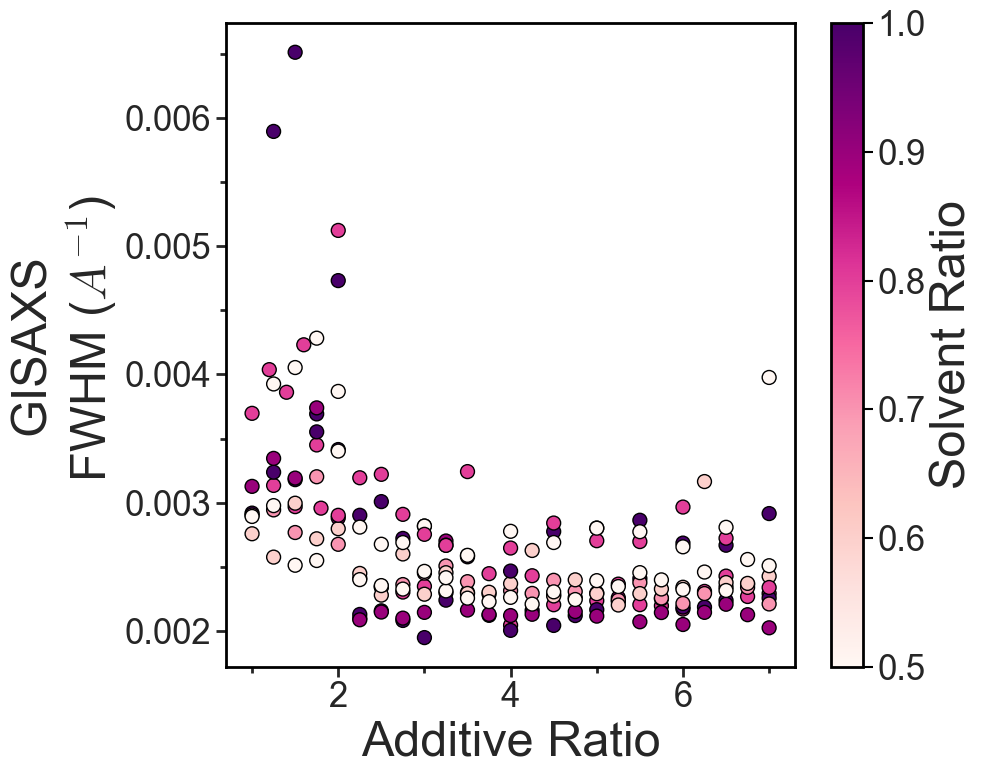

In [15]:
fig_title = 'gisaxs_fwhm_scatter'

x1 = inputs['solv_ratio']
x2 = inputs['swell_ratio']
y = targets['gisaxs_fwhm']

%matplotlib inline
rc('text', usetex=False)
rc('mathtext', fontset='cm')
rc('xtick', labelsize=25)   
rc('xtick.major', size=7)  
rc('xtick.minor', size=4)
rc('xtick.major', width=2)
rc('xtick.minor', width=2)
rc('ytick.major', width=2)
rc('ytick.minor', width=2)
rc('ytick', labelsize=25)
rc('ytick.major', size=7)
rc('ytick.minor', size=4)
rc('axes', labelsize=25) 
rc('axes', linewidth=2) 
rc('font',family='sans serif')
rc('font', style='normal')
rc('font', weight='500')
rc('font', size='15')
rc('axes', labelweight='500')
rc('axes.spines', **{'right':True, 'top':True}) 
plt.rcParams['font.family'] = 'Arial'


fig, ax = plt.subplots(figsize=(10,8))

sc = plt.scatter(x2, y, c=x1, s=100, cmap='RdPu', edgecolors='black')
colorbar = plt.colorbar(sc)
colorbar.ax.yaxis.set_tick_params(color='black', width=1.5)
colorbar.outline.set_edgecolor('black')
colorbar.set_label('Solvent Ratio', size=35)

plt.tick_params(axis='both', which='both', reset=True, top=False, right=False)

# ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Add black borders to the grid
for spine in ax.spines.values():
    spine.set_color('black')
ax.set_facecolor('white')

plt.xlabel("Additive Ratio", fontsize=35)
plt.ylabel("GISAXS\n FWHM ($A^{-1}$)", fontsize = 35)

plt.grid(False)
plt.tight_layout()
plt.savefig(fig_title, format='pdf')
plt.show()

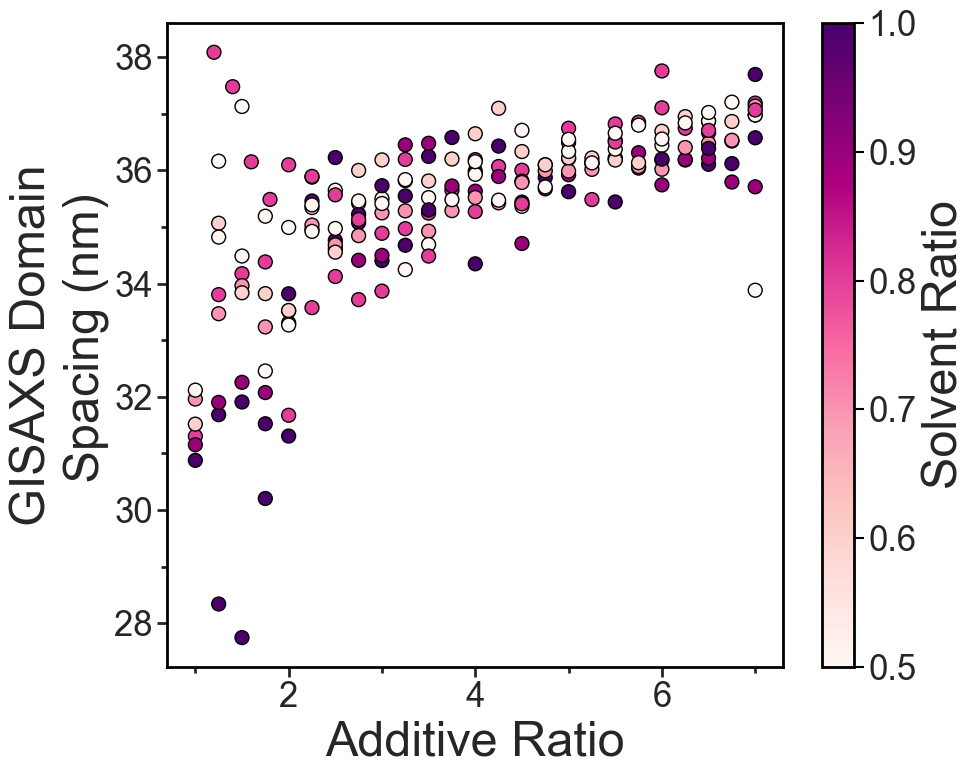

In [14]:
fig_title = 'gisaxs_ds scatter'


x1 = inputs['solv_ratio']
x2 = inputs['swell_ratio']
y = targets['gisaxs_domain']

%matplotlib inline
rc('text', usetex=False)
rc('mathtext', fontset='cm')
rc('xtick', labelsize=25)   
rc('xtick.major', size=7)  
rc('xtick.minor', size=4)
rc('xtick.major', width=2)
rc('xtick.minor', width=2)
rc('ytick.major', width=2)
rc('ytick.minor', width=2)
rc('ytick', labelsize=25)
rc('ytick.major', size=7)
rc('ytick.minor', size=4)
rc('axes', labelsize=25) 
rc('axes', linewidth=2) 
rc('font',family='sans serif')
rc('font', style='normal')
rc('font', weight='500')
rc('font', size='15')
rc('axes', labelweight='500')
rc('axes.spines', **{'right':True, 'top':True}) 
plt.rcParams['font.family'] = 'Arial'


fig, ax = plt.subplots(figsize=(10,8))

sc = plt.scatter(x2, y, c=x1, s=100, cmap='RdPu', edgecolors='black')
colorbar = plt.colorbar(sc)
colorbar.ax.yaxis.set_tick_params(color='black', width=1.5)
colorbar.outline.set_edgecolor('black')
colorbar.set_label('Solvent Ratio', size=35)

plt.tick_params(axis='both', which='both', reset=True, top=False, right=False)

# ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Add black borders to the grid
for spine in ax.spines.values():
    spine.set_color('black')
ax.set_facecolor('white')

plt.xlabel("Additive Ratio", fontsize=35)
plt.ylabel("GISAXS Domain\n Spacing (nm)", fontsize = 35)

plt.grid(False)
plt.tight_layout()
plt.savefig(fig_title, format='pdf')
plt.show()

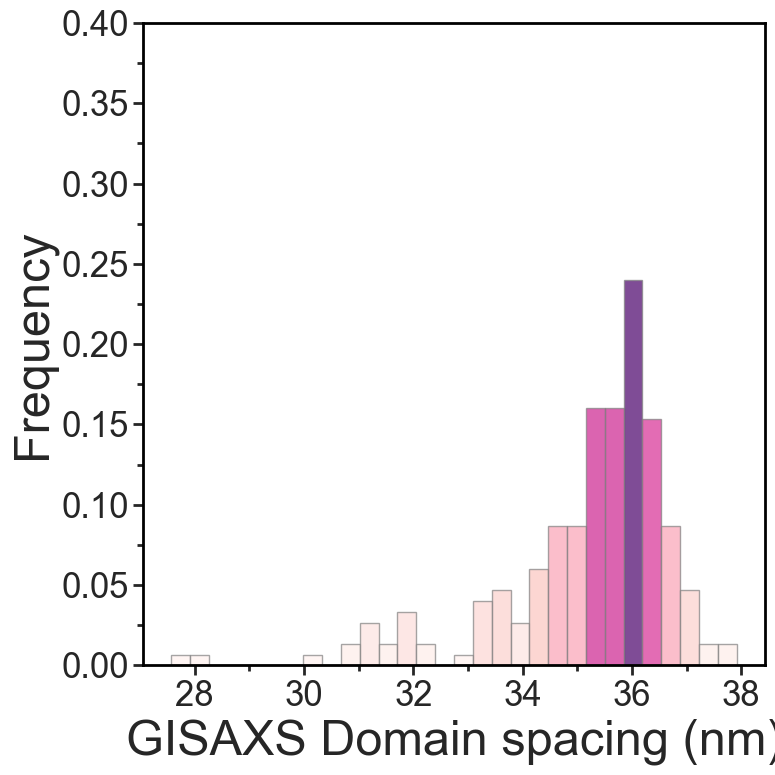

In [9]:
fig_title = 'freq_dist of gisaxs_ds'
# Calculate histogram
hist, bins = np.histogram(targets['gisaxs_domain'], bins=30)
frequency = (hist/150)
# Normalize histogram values
norm = Normalize(vmin=hist.min(), vmax=hist.max())

%matplotlib inline
rc('text', usetex=False)
rc('mathtext', fontset='cm')
rc('xtick', labelsize=25)   
rc('xtick.major', size=7)  
rc('xtick.minor', size=4)
rc('xtick.major', width=2)
rc('xtick.minor', width=2)
rc('ytick.major', width=2)
rc('ytick.minor', width=2)
rc('ytick', labelsize=25)
rc('ytick.major', size=7)
rc('ytick.minor', size=4)
rc('axes', labelsize=25) 
rc('axes', linewidth=2) 
rc('font',family='sans serif')
rc('font', style='normal')
rc('font', weight='500')
rc('font', size='15')
rc('axes', labelweight='500')
rc('axes.spines', **{'right':True, 'top':True}) 
plt.rcParams['font.family'] = 'Arial'


#This sets the size of the entire image
fig,ax = plt.subplots(figsize=(8,8))

for i in range(len(hist)):
    color = cmap(norm(hist[i]))
    plt.bar(bins[i], frequency[i], width=np.diff(bins)[0], color=color, alpha=0.7, 
                      edgecolor='grey')

plt.tick_params(axis='both', which='both', reset=True, top=False, right=False)
#This sets the numerical distance between each major tick on the x axis
ax.xaxis.set_major_locator(MultipleLocator(2))
#This sets the number of intervals between major ticks on the x axis
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
#This sets the numerical distance between each major tick on the y axis
ax.yaxis.set_major_locator(MultipleLocator(0.05))
#This sets the number of intervals between major ticks on the x axis
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# # Add black borders to the grid
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().set_facecolor('white')
# plt.title("Dist of Domain Spacing (GISAXS)", fontsize = 18, weight = "bold")
plt.xlabel("GISAXS Domain spacing (nm)", fontsize=35)
plt.ylabel("Frequency", fontsize = 35)
plt.ylim(0, 0.4)
plt.grid(False)
plt.tight_layout()
plt.savefig(output + fig_title, format='pdf')
plt.show()

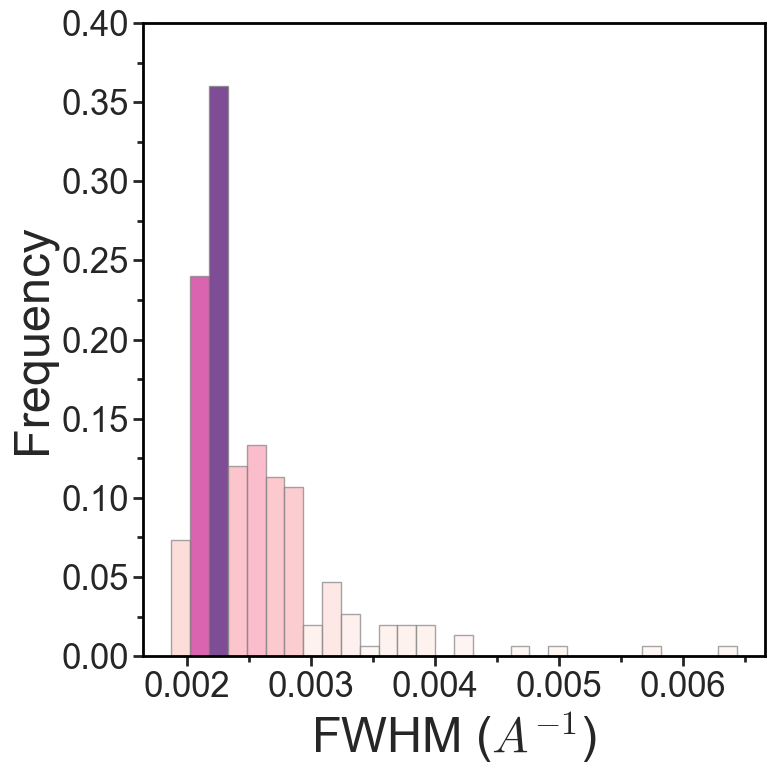

In [13]:
fig_title = 'dist of fwhm'
# Calculate histogram
hist, bins = np.histogram(targets['gisaxs_fwhm'], bins=30)
frequency = (hist/150)
# Normalize histogram values
norm = Normalize(vmin=hist.min(), vmax=hist.max())

#This sets the size of the entire image
fig,ax = plt.subplots(figsize=(8,8))

for i in range(len(hist)):
    color = cmap(norm(hist[i]))
    plt.bar(bins[i], frequency[i], width=np.diff(bins)[0], color=color, alpha=0.7, 
           edgecolor='grey')

plt.tick_params(axis='both', which='both', reset=True, top=False, right=False)
#This sets the numerical distance between each major tick on the x axis
ax.xaxis.set_major_locator(MultipleLocator(.001))
#This sets the number of intervals between major ticks on the x axis
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
#This sets the numerical distance between each major tick on the y axis
ax.yaxis.set_major_locator(MultipleLocator(0.05))
#This sets the number of intervals between major ticks on the x axis
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.rcParams['font.family'] = 'Arial'

# # Add black borders to the grid
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().set_facecolor('white')
plt.grid(False)
# plt.title("Full Width at Half Maximum", fontsize = 18, weight = "bold")
plt.xlabel("FWHM ($A^{-1}$)", fontsize = 35)
plt.ylabel("Frequency", fontsize = 35)
plt.ylim(0, 0.4)
plt.tight_layout()
plt.savefig(output + fig_title, format='pdf')
plt.show()

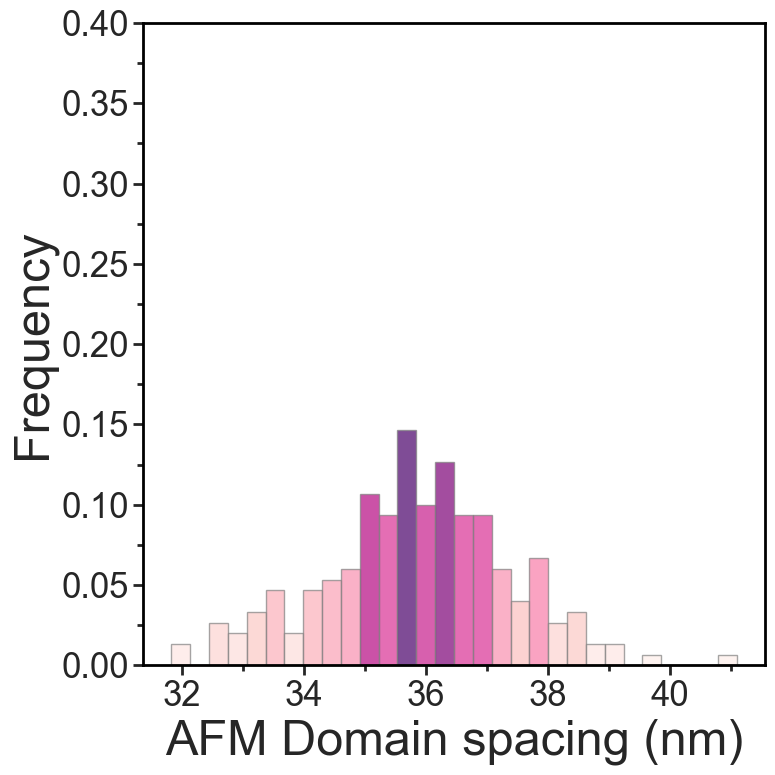

In [14]:
fig_title = 'dist of afm_ds'
# Calculate histogram
hist, bins = np.histogram(targets['afm_domain'], bins=30)
frequency = (hist/150)
# Normalize histogram values
norm = Normalize(vmin=hist.min(), vmax=hist.max())

#This sets the size of the entire image
fig,ax = plt.subplots(figsize=(8,8))

for i in range(len(hist)):
    color = cmap(norm(hist[i]))
    plt.bar(bins[i], frequency[i], width=np.diff(bins)[0], color=color, alpha=0.7, 
           edgecolor='grey')

plt.tick_params(axis='both', which='both', reset=True, top=False, right=False)
#This sets the numerical distance between each major tick on the x axis
ax.xaxis.set_major_locator(MultipleLocator(2))
#This sets the number of intervals between major ticks on the x axis
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
#This sets the numerical distance between each major tick on the y axis
ax.yaxis.set_major_locator(MultipleLocator(0.05))
#This sets the number of intervals between major ticks on the x axis
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.rcParams['font.family'] = 'Arial'
# # Add black borders to the grid
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().set_facecolor('white')
plt.grid(False)
# plt.title("Dist of Domain Spacing (AFM)", fontsize = 18, weight = "bold")
plt.xlabel("AFM Domain spacing (nm)", fontsize = 35)
plt.ylabel("Frequency", fontsize = 35)
plt.ylim(0, 0.4)
plt.tight_layout()
plt.savefig(output + fig_title, format='pdf')
plt.show()

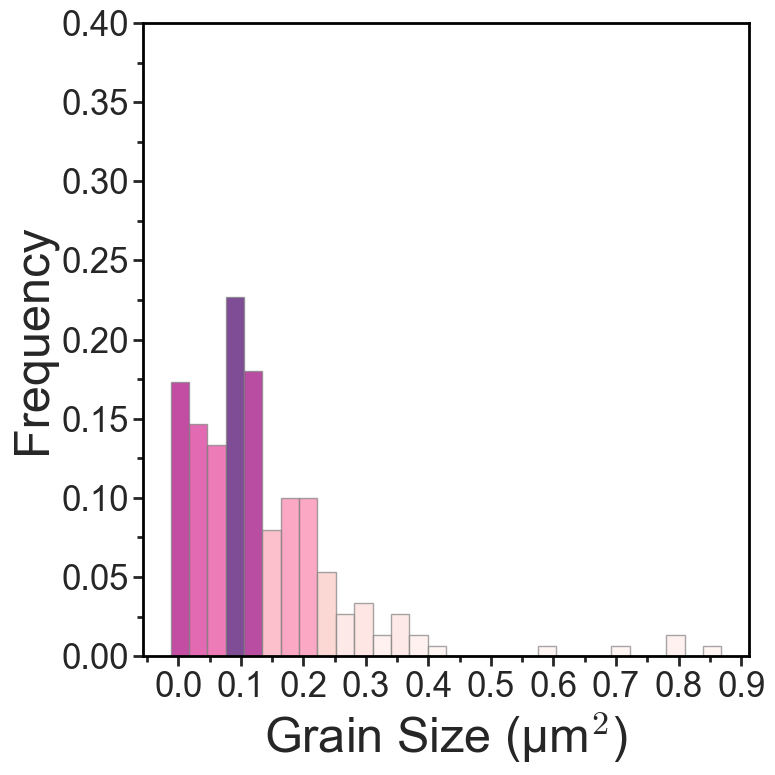

In [15]:
fig_title = 'dist of grain area'
# Calculate histogram
hist, bins = np.histogram(targets['afm_grain'], bins=30)
frequency = (hist/150)
# Normalize histogram values
norm = Normalize(vmin=hist.min(), vmax=hist.max())

#This sets the size of the entire image
fig,ax = plt.subplots(figsize=(8,8))

for i in range(len(hist)):
    color = cmap(norm(hist[i]))
    plt.bar(bins[i], frequency[i], width=np.diff(bins)[0], color=color, alpha=0.7, 
           edgecolor='grey')

plt.tick_params(axis='both', which='both', reset=True, top=False, right=False)
#This sets the numerical distance between each major tick on the x axis
ax.xaxis.set_major_locator(MultipleLocator(.1))
#This sets the number of intervals between major ticks on the x axis
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
#This sets the numerical distance between each major tick on the y axis
ax.yaxis.set_major_locator(MultipleLocator(0.05))
#This sets the number of intervals between major ticks on the x axis
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.rcParams['font.family'] = 'Arial'

# # Add black borders to the grid
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().set_facecolor('white')
plt.grid(False)
# plt.title("", fontsize = 18, weight = "bold")
plt.xlabel("Grain Size (\u03BCm$^{2}$)", fontsize = 35)
plt.ylabel("Frequency", fontsize = 35)
plt.ylim(0, 0.4)
plt.tight_layout()
plt.savefig(output + fig_title, format='pdf')
plt.show()

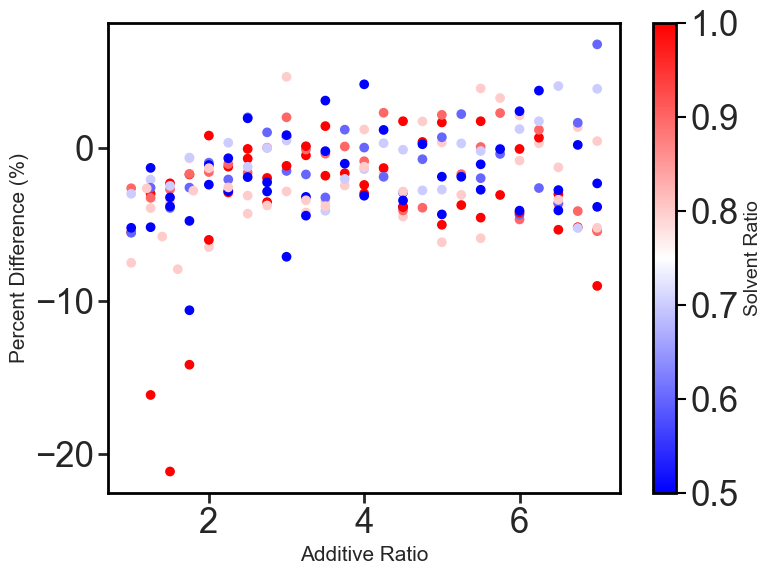

In [16]:
gisaxs = targets['gisaxs_domain']
afm = targets['afm_domain']
x1 = inputs['solv_ratio']
x2 = inputs['swell_ratio']
er = pd.DataFrame()
er['Error'] = ((gisaxs - afm)/((gisaxs+afm)/2)) * 100
# color_values = er['Error']
color_values = x1

# Create a normalization instance that centers the colormap at 0
# norm = mcolors.TwoSlopeNorm(vcenter=0)

# Plotting
plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', which='both', reset=True, top=False, right=False)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.scatter(x2, er['Error'], c=x1, cmap=plt.cm.bwr)
colorbar = plt.colorbar()
colorbar.ax.yaxis.set_tick_params(color='black', width=1.5)   # Set tick color to black
colorbar.outline.set_edgecolor('black')
colorbar.set_label('Solvent Ratio', size=14)
plt.xlabel('Additive Ratio', fontsize = 15)
plt.ylabel('Percent Difference (%)', fontsize = 15)
plt.gca().set_facecolor('white')
# plt.title('Scatter Plot with bwr Colormap')
plt.grid(False)
plt.tight_layout()
# plt.savefig('afm_gisaxs_diff_perce.png', format='png')
plt.show()

In [17]:
inputs_outputs = df.iloc[:, 1:]

# Define mapping for solv_ratio
type_mapping = {100: 1, '90/10': 0.9, '80/20': 0.8, '70/30': 0.7, '60/40': 0.6, '50/50': 0.5}
inputs_outputs['solv_ratio'] = inputs_outputs['solv_ratio'].replace(type_mapping)

# Encode categorical input 'add_type'
le_addType = LabelEncoder()
inputs_outputs['add_type'] = le_addType.fit_transform(inputs_outputs['add_type'])

# print(inputs_outputs)

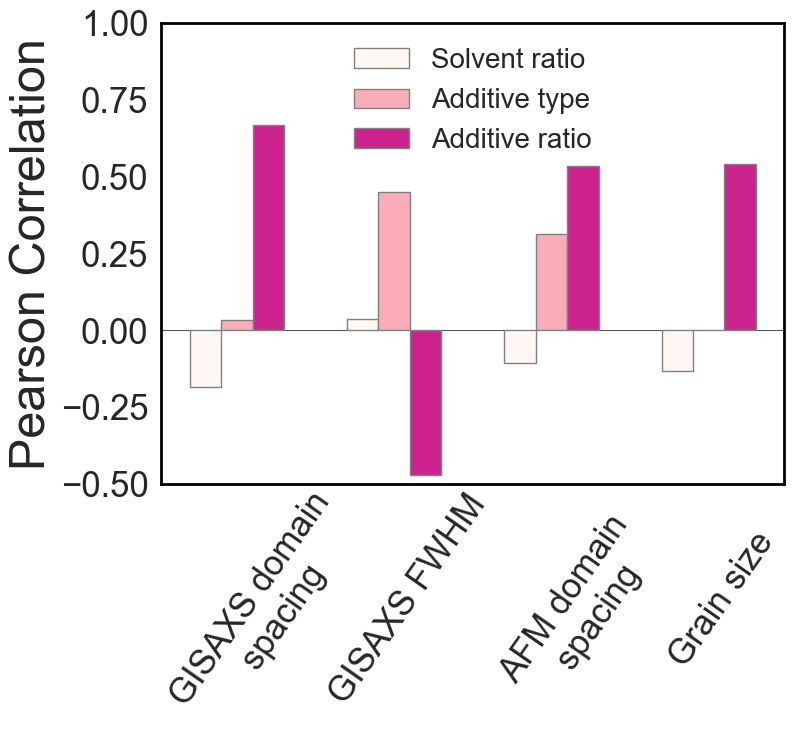

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig_title = 'pearson in_out'
# Assuming inputs_outputs is already defined and contains both inputs and outputs
cor = inputs_outputs.corr()

# Extract correlation values for the outputs with the three input variables
input_vars = ['solv_ratio', 'add_type', 'swell_ratio']
output_vars = ['gisaxs_domain', 'gisaxs_fwhm', 'afm_domain', 'afm_grain']

input_labs = ['Solvent ratio', 'Additive type', 'Additive ratio']
output_labs = ['GISAXS domain\n spacing', 'GISAXS FWHM', 'AFM domain\n spacing', 'Grain size']

# Generate colors from the colormap
colors = [cmap(i / len(input_vars)) for i in range(len(input_vars))]

# Create a single bar plot
fig, ax = plt.subplots(figsize=(8, 8))
width = 0.2  # Width of each bar
x = np.arange(len(output_vars))  # X locations for the outputs

for i, input_var in enumerate(input_vars):
    correlations = cor.loc[input_var, output_vars]
    ax.bar(x + i * width, correlations, width=width, label=input_labs[i], color=colors[i], edgecolor='grey')

# Add black line at y = 0
ax.axhline(0, color='black', linewidth=0.5, linestyle='-', zorder=0)

ax.set_xticks(x + width)
ax.set_xticklabels(output_labs, rotation=55, ha='center', rotation_mode="anchor", y=-.2)
# plt.setp(ax.get_xticklabels(), ha='right', rotation=25, x=5)  # nudging them right

ax.set_ylabel('Pearson Correlation', fontsize = 35)

# Tick marks on both axes
ax.tick_params(axis='both', which='both', direction='out', length=6, width=1)
# ax.tick_params(axis='x', labelsize=22.5)

plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().set_facecolor('white')
plt.grid(False)
ax.set_ylim(-0.5, 1)

# Ensure only bars appear in the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(input_labs)], input_labs, fontsize=20, facecolor='white', frameon=False)

plt.tight_layout()
plt.savefig(output + fig_title, format='pdf')
plt.show()

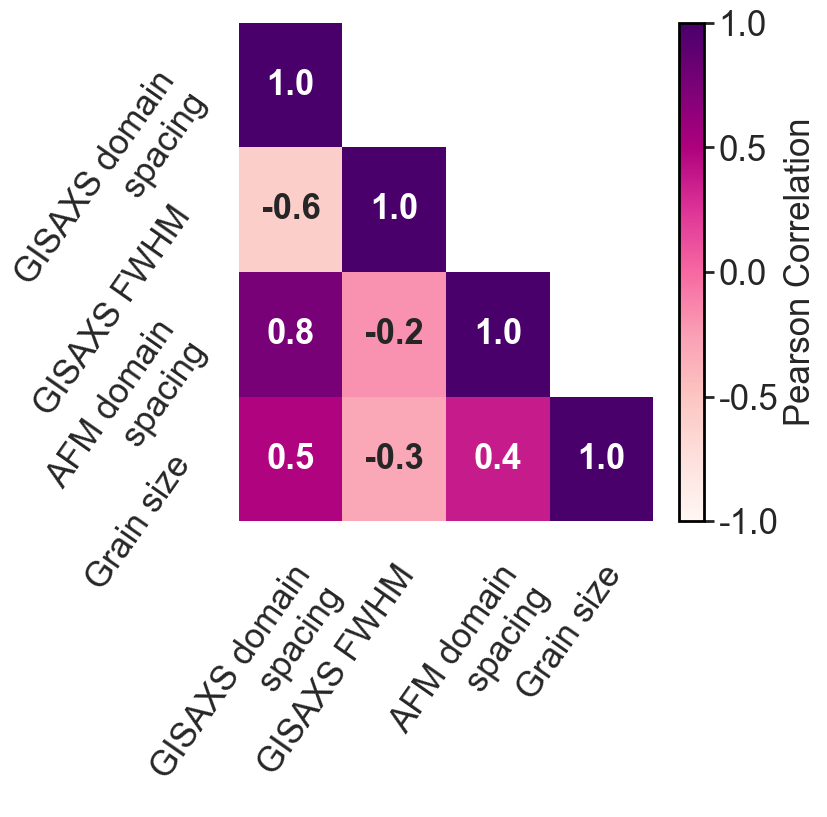

In [46]:
fig_title = 'pearson outputs'
# List of new column names
new_column_names = ['GISAXS\n domain\n spacing', 'GIASXS\n FWHM', 'AFM\n domain\n spacing', 'Grain\n size']

# Change column names using the list
targets.columns = new_column_names
cmap = plt.cm.RdPu
# Compute correlation matrix
cor = targets.corr()

# Use the following lines to produce a triangle heatmap
mask = np.triu(cor)
np.fill_diagonal(mask, False)

# Create the heatmap
plt.figure(figsize=(8.5, 8.5))
ax = sns.heatmap(cor, cmap=cmap, annot=True, fmt=".1f", mask=mask,
                 linewidths=0, linecolor='black', vmin=-1, vmax=1, annot_kws={'size': 25, 'weight': 'bold'})

# Remove cell outlines from cells with no values by drawing gridlines manually
for i in range(cor.shape[0]):
    for j in range(cor.shape[1]):
        if mask[i, j]:
            rect = plt.Rectangle([j, i], 1, 1, fill=False, edgecolor='white', linewidth=0)
            ax.add_patch(rect)

# ax.set_xticklabels(output_labs, rotation=45, ha='right')
ax.set_xticklabels(output_labs, rotation=55, ha='right', rotation_mode="anchor", y=-0.05)
ax.set_yticklabels(output_labs, rotation=55, ha='right', rotation_mode="anchor", x=-0.1)
ax.tick_params(axis='both', which='both', direction='out', length=6, width=1)
# ax.tick_params(axis='x', which='both', direction='out', length=6, width=1)
# Adding an outline to the colorbar
colorbar = ax.collections[0].colorbar
colorbar.outline.set_edgecolor('black')
colorbar.outline.set_linewidth(2)

# Set custom tick intervals (e.g., every 0.2)
tick_values = np.arange(-1, 1.1, 0.5)  # Adjust as needed
colorbar.set_ticks(tick_values)
colorbar.set_ticklabels([f"{t:.1f}" for t in tick_values])  # Format as one decimal place
colorbar.set_label('Pearson Correlation', size=25)

#plt.tight_layout()
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.savefig(output + fig_title, format='pdf')
plt.show()